In [7]:
#Import all of our necessary libraries

import os
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [8]:
def isFloat(s):
    try:
        float(s)
        return True
    except ValueError:
        #print("Value error: ",s)
        return False

with open("Log-batteryusage.csv") as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
    num_iters = len(data)-1
    num_nodes = len(data[0])-1
    batteryLevels = [x[:] for x in [[0.0] * num_nodes] * num_iters]
    print(num_nodes)

    for i in range(0,num_iters-1):
        for j in range(1,num_nodes):
            
            if(isFloat(data[i][j])):
                try:
                    batteryLevels[i][j-1] = float(data[i][j])
                except IndexError:
                    print(i,j)

2001


batteryFreq = [[0]*10]*199
for row_num in range(0,199):
    for col in range(0,10):
        ind = int(batteryLevels[row_num ][col]/10)
        batteryFreq[row_num ][ind] += 1

In [9]:
batteryFreq = [[0]*10 for _ in range(200)]
for row_num in range(0,num_iters):
    for col in range(0,num_nodes-1):
        ind = int(batteryLevels[row_num][col+1]/10)
        temp = batteryFreq[row_num][ind] + 1
        batteryFreq[row_num][ind] = temp

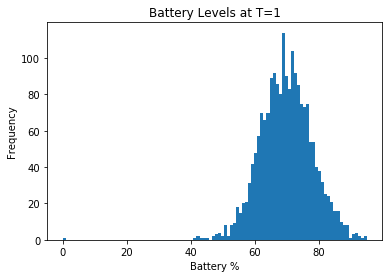

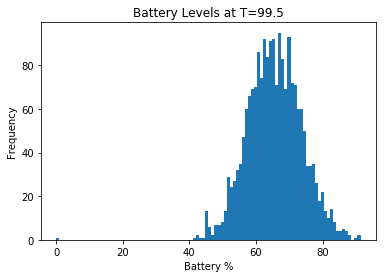

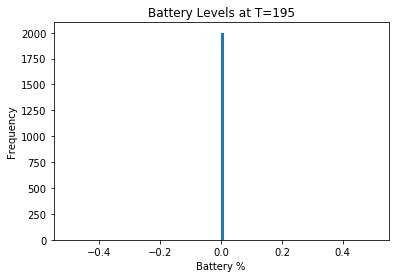

In [10]:
plt.hist(batteryLevels[1][1:], bins=100)
plt.title("Battery Levels at T=1")
plt.xlabel("Battery %")
plt.ylabel("Frequency")
plt.show()

plt.hist(batteryLevels[int(num_iters/2)][1:], bins=100)
middle = str(num_iters/2)
plt.title("Battery Levels at T="+middle)
plt.xlabel("Battery %")
plt.ylabel("Frequency")
plt.show()

plt.hist(batteryLevels[num_iters-1][1:], bins=100)
end = str(num_iters-4)
plt.title("Battery Levels at T="+end)
plt.xlabel("Battery %")
plt.ylabel("Frequency")
plt.show()

In [11]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 100), ylim=(0, 400))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = [0,10,20,30,40,50,60,70,80,90]
    y = batteryFreq[i]
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=25, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

#to save file:
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

HTML(anim.to_html5_video())

In [12]:
num = 0
def update_hist(num):
    plt.cla()
    plt.hist(batteryLevels[num],bins=100)
    plt.title("Battery Levels at T="+str(num))
    plt.xlabel("Battery %")
    plt.ylabel("Frequency")

fig = plt.figure()
hist = plt.hist(batteryLevels[0])

animation = animation.FuncAnimation(fig, update_hist, num_iters, fargs=(num) )
HTML(animation.to_html5_video())

In [13]:
b = [x[:] for x in [[0.0] * (num_nodes-2)] * (num_iters-1)]
for i in range(1,num_iters-1):
    b[i-1] = sorted(batteryLevels[i][:2000])
    
j=0
while batteryLevels[1][j] != 0:
    j = j+1
    
print(num_nodes)
print(j,batteryLevels[1][1990:])
print(b[0][0])

2001
2000 [72.2048, 63.3641, 63.4153, 63.0984, 86.5551, 68.7761, 68.9046, 64.3974, 73.6076, 71.2871, 0.0]
41.3471


In [14]:
print("Iteration\tMin\tLowerQuartile\tUpperQuartile\t  Max")
for i in range(0,num_iters-1):
    minimum = b[i][0]
    maximum = b[i][1998]
    lowerq = b[i][499]
    upperq = b[i][1499]
    print("  ",i,"\t","\t",minimum,"\t",lowerq,"\t",upperq,"\t",maximum)

Iteration	Min	LowerQuartile	UpperQuartile	  Max
   0 	 	 41.3471 	 64.5285 	 75.0843 	 94.0996
   1 	 	 41.3471 	 64.4845 	 75.0643 	 94.0796
   2 	 	 41.3471 	 64.4572 	 75.0443 	 94.0596
   3 	 	 41.3471 	 64.4372 	 75.0242 	 94.0396
   4 	 	 41.3471 	 64.4172 	 75.0042 	 94.0196
   5 	 	 41.3471 	 64.3972 	 74.9639 	 93.9996
   6 	 	 41.3471 	 64.3683 	 74.9439 	 93.9796
   7 	 	 41.3471 	 64.3483 	 74.9239 	 93.9596
   8 	 	 41.3471 	 64.311 	 74.9039 	 93.9396
   9 	 	 41.3471 	 64.2767 	 74.8839 	 93.9196
   10 	 	 41.3471 	 64.2567 	 74.8639 	 93.8996
   11 	 	 41.3471 	 64.2367 	 74.8439 	 93.8796
   12 	 	 41.3471 	 64.2167 	 74.8239 	 93.8596
   13 	 	 41.3471 	 64.1958 	 74.8038 	 93.8396
   14 	 	 41.3471 	 64.1758 	 74.7838 	 93.8196
   15 	 	 41.3471 	 64.1558 	 74.7638 	 93.7996
   16 	 	 41.3471 	 64.1302 	 74.7419 	 93.7796
   17 	 	 41.3471 	 64.0704 	 74.7218 	 93.7596
   18 	 	 41.3471 	 64.0504 	 74.7018 	 93.7396
   19 	 	 41.3471 	 64.0304 	 74.6818 	 93.7196
   